### Author: Samiyanur Islam
### Github: https://github.com/jojo142
### LinkedIn: https://www.linkedin.com/in/samiya-islam-050b7621a/
### Personal Website: https://samiyanurislam.com

# Task 1: Investigate and analyze price data
#### Here is your task
After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

Download the monthly natural gas price data.
Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
Your code should take a date as input and return a price estimate.
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool and one that JPMorgan Chase uses a lot in quantitative research since it’s capable of completing complex tasks.

Moving forward in this program, the example answers are given in Python code. (If Python is not downloaded on your system, you can execute Python code in Jupyter Notebook online for free.)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [133]:
# Load the monthly natural gas price data from the CSV file
data = pd.read_csv("NAT_gas.csv", parse_dates=["Dates"])
data.set_index("Dates", inplace=True)


In [134]:
# Convert the Prices column to numeric values (including scientific notation strings)
data["Prices"] = pd.to_numeric(data["Prices"], errors="coerce")

In [135]:
# Forward fill missing values
data["Prices"].fillna(method='ffill', inplace=True)

In [136]:
# Function to create lag features for time-series data
def create_lag_features(data, target_col, n_lags):
    for lag in range(1, n_lags + 1):
        data[f"{target_col}_lag_{lag}"] = data[target_col].shift(lag)
    return data


In [137]:
# Create lag features
data = create_lag_features(data, target_col="Prices", n_lags=12)  # Use past 12 months as features


In [138]:
# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)

# Using Random Forest

In [139]:
# Load the monthly natural gas price data from the CSV file
data = pd.read_csv("NAT_gas.csv", parse_dates=["Dates"])
data.set_index("Dates", inplace=True)


In [140]:
# Convert the Prices column to numeric values (including scientific notation strings)
data["Prices"] = pd.to_numeric(data["Prices"], errors="coerce")

# Create additional time features
data["Month"] = data.index.month
data["DayOfWeek"] = data.index.dayofweek
data["DayOfYear"] = data.index.dayofyear
data["WeekOfYear"] = data.index.isocalendar().week
data["Quarter"] = data.index.quarter
data["Season"] = (data.index.month % 12 + 3) // 3

In [141]:
# Separate the target variable (Prices) and the features (time-related features)
X = data[["Month", "DayOfWeek", "DayOfYear", "WeekOfYear", "Quarter", "Season"]]
y = data["Prices"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [142]:
# Train a Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# R-squared for proportion of variance in the dependent variable (gas prices) that is predictable from the independent variables (time). It provides a value between 0 and 1, where 1 indicates a perfect fit.
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# MAE for average absolute difference between the predicted values and the actual values. It is less sensitive to outliers compared to RMSE.
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

#MSLE measures the mean squared logarithmic difference between the predicted values and the actual values. It is suitable for data that follows an exponential or logarithmic distribution.
msle = mean_squared_log_error(y_test, y_pred)
print(f'MSLE: {msle}')

# EVS measures the proportion of the variance in the dependent variable that is explained by the model.
explained_variance = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {explained_variance}')

RMSE: 0.816938430972613
R2 Score: -0.3903924999999888
MAE: 0.6905199999999972
MSLE: 0.004429198102908987
Explained Variance Score: -0.3722028466666556


In [143]:
# Extrapolate prices for each month in the next year (from the last available date in the data)
last_date = data.index[-1]
extrapolation_dates = pd.date_range(start=last_date, periods=12, freq="M") + pd.DateOffset(days=30)
extrapolation_features = {
    "Month": extrapolation_dates.month,
    "DayOfWeek": extrapolation_dates.dayofweek,
    "DayOfYear": extrapolation_dates.dayofyear,
    "WeekOfYear": extrapolation_dates.isocalendar().week,
    "Quarter": extrapolation_dates.quarter,
    "Season": (extrapolation_dates.month % 12 + 3) // 3
}
extrapolated_prices = model.predict(pd.DataFrame(extrapolation_features))

extrapolation_data = pd.DataFrame({"Date": extrapolation_dates, "Estimated_Price": extrapolated_prices})
print(extrapolation_data)

         Date  Estimated_Price
0  2024-10-30          11.3730
1  2024-11-30          10.6780
2  2024-12-30          11.0566
3  2025-01-30          11.9690
4  2025-03-02          12.0700
5  2025-03-30          12.0680
6  2025-04-30          11.0642
7  2025-05-30          10.8142
8  2025-06-30          10.2684
9  2025-07-30          11.1970
10 2025-08-30          11.1120
11 2025-09-30          11.1770


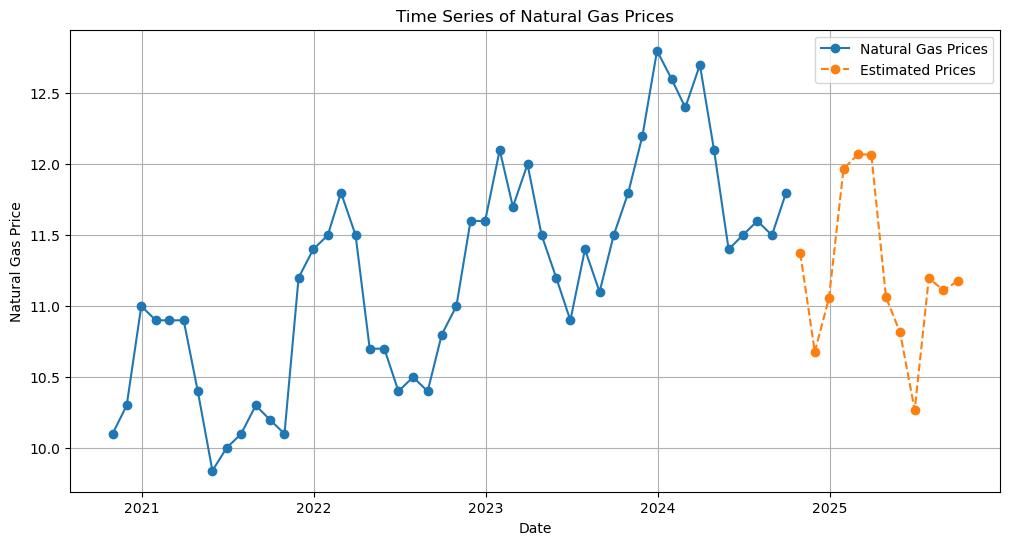

In [144]:
# Plot the time series of natural gas prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Prices"], label="Natural Gas Prices", marker="o", linestyle="-")
plt.plot(extrapolation_data["Date"], extrapolation_data["Estimated_Price"], marker="o", label="Estimated Prices", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title("Time Series of Natural Gas Prices")
plt.legend()
plt.grid(True)
plt.show()

# Conlclusion:

I think in the context of predicting future gas prices for your specific dataset, Gradient Boosting emerges as a more favorable choice compared to Random Forest. The reason behind this lies in the unique characteristics of your time-series data. The temporal dependency in gas prices, where values at a given time point are influenced by past observations, requires a model that can effectively capture such sequential patterns. Gradient Boosting's sequential nature empowers it to learn from past errors and decipher complex temporal relationships, leading to more accurate predictions. Additionally, the gas price graph exhibits an upward increasing trend, which Gradient Boosting is adept at identifying due to its ability to recognize intricate non-linear relationships. Its capability to handle seasonality further enhances its performance, as gas prices may be influenced by recurring patterns over regular intervals. By leveraging these strengths, Gradient Boosting can better interpret the dynamics of gas prices and provide valuable insights for decision-making in the commodities trading domain.

# Task 2: Price A Commodity Storage Contract

Background:
The concept is simple: any trade agreement is as valuable as the price you can sell minus the price at which you are able to buy. Any cost incurred as part of executing this agreement is also deducted from the overall value. So, for example, if I can purchase a million MMBtu of natural gas in summer at $2/MMBtu, store this for four months, and ensure that I can sell the same quantity at $3/MMBtu without incurring any additional costs, the value of this contract would be ($3-$2) *1e6 = $1million. If there are costs involved, such as having to pay the storage facility owner a fixed fee of $100K a month, then the 'value' of the contract, from my perspective, would drop by the overall rental amount to $600K. Another cost could be the injection/withdrawal cost, like having to pay the storage facility owner $10K per 1 million MMBtu for injection/withdrawal, then the price will further go down by $10K to $590K. Additionally, if I am supposed to foot a bill of $50K each time for transporting the gas to and from the facility, the cost of this contract would fall by another $100K. Think of the valuation as a fair estimate at which both the trading desk and the client would be happy to enter into the contract. 

#### Here is your task:
You need to create a prototype pricing model that can go through further validation and testing before being put into production. Eventually, this model may be the basis for fully automated quoting to clients, but for now, the desk will use it with manual oversight to explore options with the client. 

You should write a function that is able to use the data you created previously to price the contract. The client may want to choose multiple dates to inject and withdraw a set amount of gas, so your approach should generalize the explanation from before. Consider all the cash flows involved in the product.

The input parameters that should be taken into account for pricing are:

- Injection dates. 
- Withdrawal dates.
- The prices at which the commodity can be purchased/sold on those dates.
- The rate at which the gas can be injected/withdrawn.
- The maximum volume that can be stored.
- Storage costs.

Write a function that takes these inputs and gives back the value of the contract. You can assume there is no transport delay and that interest rates are zero. Market holidays, weekends, and bank holidays need not be accounted for. Test your code by selecting a few sample inputs.

In [145]:
from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))

    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))
    for i in range(len(all_dates)):
    # processing code for each date
        start_date = all_dates[i]
        if start_date in in_dates:
        # Inject on these dates and sum up cash flows
            if volume + rate <= total_vol:
                volume += rate
                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]

                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print(f'Injected gas on {start_date} at a price of {in_prices[in_dates.index(start_date)]}')
            else:
                # can't inject cuz curr_vol + rate > total_vol
                print(f'Injection is not possible on date {start_date} as there is insufficient space in the storage facility')
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print(f'Extracted gas on {start_date} at a price of {out_prices[out_dates.index(start_date)]}')
            else:
                # can't withdraw cuz curr_vol < rate
                print(f'Extraction is not possible on date {start_date} as there is insufficient volume of gas stored')
    
    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] 
in_prices = [20, 21, 20.5, 22]
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] 
out_prices = [23, 19, 21, 25] 

rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005 
max_storage_volume = 500000 # max_capacity of storage facility in cubic feet
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")

Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0


# TASK 3: Credit Risk Analysis

#### Here is the background information on your task
You have now moved to a new team assisting the retail banking arm, which has been experiencing higher-than-expected default rates on personal loans. Loans are an important source of revenue for banks, but they are also associated with the risk that borrowers may default on their loans. A default occurs when a borrower stops making the required payments on a debt.

The risk team has begun to look at the existing book of loans to see if more defaults should be expected in the future and, if so, what the expected loss will be. They have collected data on customers and now want to build a predictive model that can estimate the probability of default based on customer characteristics. A better estimate of the number of customers defaulting on their loan obligations will allow us to set aside sufficient capital to absorb that loss. They have decided to work with you in the QR team to help predict the possible losses due to the loans that would potentially default in the next year.

Charlie, an associate in the risk team, who has been introducing you to the business area, sends you a small sample of their loan book and asks if you can try building a prototype predictive model, which she can then test and incorporate into their loss allowances.

#### Here is your task
The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

- You should produce a function that can take in the properties of a loan and output the expected loss.
- You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [146]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [147]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
df.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


In [148]:
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
df ['debt_to_income'] = df['total_debt_outstanding'] / df['income']
df = df.drop(['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income'], 1)
df.head()

/var/folders/s6/20d68lss3j5cb0fvbfxdl__m0000gn/T/ipykernel_18048/1431703863.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income'], 1)


,credit_lines_outstanding,years_employed,fico_score,default,payment_to_income,debt_to_income
0,0,5,605,0,0.066909,0.050173
1,5,2,572,1,0.073510,0.308789
2,0,4,602,0,0.051058,0.030787
3,0,5,612,0,0.064105,0.033645
4,1,6,631,0,0.057395,0.075435


In [149]:
features = df.columns
print(features)

Index(['credit_lines_outstanding', 'years_employed', 'fico_score', 'default',
       'payment_to_income', 'debt_to_income'],
      dtype='object')


In [150]:
corr_matrix = df.corr()
corr_matrix

,credit_lines_outstanding,years_employed,fico_score,default,payment_to_income,debt_to_income
credit_lines_outstanding,1.000000,-0.087900,-0.258177,0.862815,0.115691,0.957247
years_employed,-0.087900,1.000000,0.255873,-0.284506,-0.299698,-0.194562
fico_score,-0.258177,0.255873,1.000000,-0.324515,-0.042127,-0.256868
default,0.862815,-0.284506,-0.324515,1.000000,0.162815,0.852406
payment_to_income,0.115691,-0.299698,-0.042127,0.162815,1.000000,0.132254
debt_to_income,0.957247,-0.194562,-0.256868,0.852406,0.132254,1.000000


In [151]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [152]:
lb = 0.5
ub = 0.9
for index, row in corr_matrix.iterrows():
    for column in corr_matrix.columns:
        value = row[column]
        if ub <= value <= ub:
            print(f"Value {value} at index {index} in column {column} is within the range.")



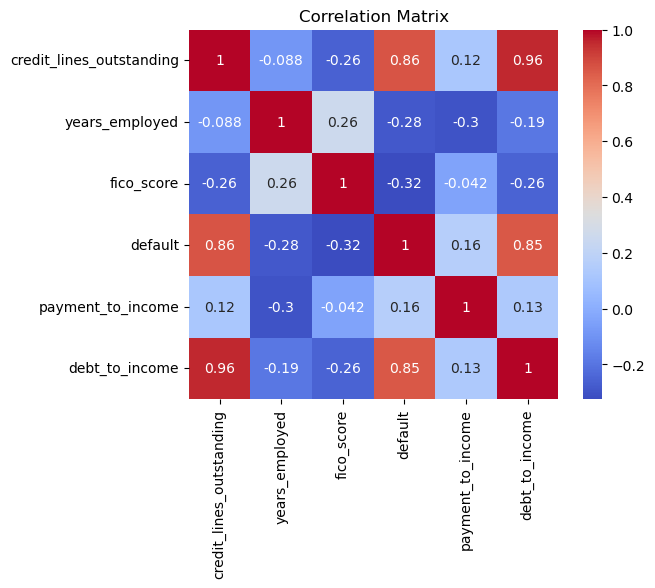

In [153]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [155]:
model = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(model.coef_, model.intercept_)

[[ 3.18379073 -1.05539101 -0.01458222  6.55649523 -0.00679513  0.16683478]] [-0.25979916]
0.0
1.0


In [156]:
y_pred = model.predict(df[features])
fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default'] - y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))

0.0
1.0


# TASK 4: Bucket FICO scores

#### Here is the background information on your task
Now that you are familiar with the portfolio and personal loans and risk are using your model as a guide to loss provisions for the upcoming year, the team now asks you to look at their mortgage book. They suspect that FICO scores will provide a good indication of how likely a customer is to default on their mortgage. Charlie wants to build a machine learning model that will predict the probability of default, but while you are discussing the methodology, she mentions that the architecture she is using requires categorical data. As FICO ratings can take integer values in a large range, they will need to be mapped into buckets. She asks if you can find the best way of doing this to allow her to analyze the data.

A FICO score is a standardized credit score created by the Fair Isaac Corporation (FICO) that quantifies the creditworthiness of a borrower to a value between 300 to 850, based on various factors. FICO scores are used in 90% of mortgage application decisions in the United States. The risk manager provides you with FICO scores for the borrowers in the bank’s portfolio and wants you to construct a technique for predicting the PD (probability of default) for the borrowers using these scores. 


#### Here is your task
Charlie wants to make her model work for future data sets, so she needs a general approach to generating the buckets. Given a set number of buckets corresponding to the number of input labels for the model, she would like to find out the boundaries that best summarize the data. You need to create a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score.

The process of doing this is known as quantization. You could consider many ways of solving the problem by optimizing different properties of the resulting buckets, such as the mean squared error or log-likelihood (see below for definitions). For background on quantization, see here.

- Mean squared error

You can view this question as an approximation problem and try to map all the entries in a bucket to one value, minimizing the associated squared error. We are now looking to minimize the following: MSE formula

- Log-likelihood

A more sophisticated possibility is to maximize the following log-likelihood function:

Where bi is the bucket boundaries, ni is the number of records in each bucket, ki is the number of defaults in each bucket, and pi = ki / ni is the probability of default in the bucket. This function considers how rough the discretization is and the density of defaults in each bucket. This problem could be addressed by splitting it into subproblems, which can be solved incrementally (i.e., through a dynamic programming approach). For example, you can break the problem into two subproblems, creating five buckets for FICO scores ranging from 0 to 600 and five buckets for FICO scores ranging from 600 to 850. Refer to this page for more context behind a likelihood function. This page may also be helpful for background on dynamic programming. 

In [166]:
import pandas as pd
import numpy as np

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print("Length of x:", len(x))
print("Length of y:", len(y))

default = [0 for i in range(851)]
total = [0 for i in range(851)]

for i in range(n):
    y[i] = int(y[i])
    default[y[i] - 300] += x[i]
    total[y[i] - 300] += 1

for i in range(1, 551):
    default[i] += default[i - 1]
    total[i] += total[i - 1]

def log_likelihood(n, k):
    p = k / n
    if p == 0 or p == 1:
        return 0
    return k * np.log(p) + (n - k) * np.log(1 - p)

r = 10
dp = [[[-10 ** 18, 0] for i in range(551)] for j in range(r + 1)]

for i in range(r + 1):
    for j in range(551):
        if i == 0:
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if total[j] == total[k]:
                    continue
                if i == 1:
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if dp[i][j][0] < (dp[i - 1][k][0] + log_likelihood(total[j] - total[k], default[j] - default[k])):
                        dp[i][j][0] = log_likelihood(total[j] - total[k], default[j] - default[k]) + dp[i - 1][k][0]
                        dp[i][j][1] = k

result = round(dp[r][550][0], 4)
print("Result:", result)

k = 550
l = []
while r >= 0:
    l.append(k + 300)
    k = dp[r][k][1]
    r -= 1

print("List:", l)


Length of x: 10000
Length of y: 10000
Result: -4217.8245
List: [850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
